<a href="https://colab.research.google.com/github/aravind0654/aravindb0654/blob/master/TM_Sentiment__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np 
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")


In [4]:
consumerkey = "FeavrEUolXwG01wNZ6oeSLn8W"
consumerSecret = "wu5yA58gla3RdnnjiQOT4JwwIcXr1PYcvGVbYpOAiNtRwPLzwU"
accessToken    = "838789851893886977-RzxD4DJ1iACFmU5Kmv6a9TnMKG0Iirc"
accessTokenSecret = "Pv0y6OSqNedykCBPSablFSNHZCMWmYzocT988QMKQ7SgS"

In [7]:
#create the athentication object
authenticate = tweepy.OAuthHandler(consumer_key= consumerkey,
                                   consumer_secret = consumerSecret)

#set the access token and accesstokenSecret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API object while passing in the auth info
api = tweepy.API(auth_handler=authenticate, host = "api.twitter.com", search_host= "search.twitter.com",
                 upload_host = 'upload.twitter.com', wait_on_rate_limit = True)


In [64]:
#extract 1000 tweets from # twitter
tweets = api.search(q = "BajrangDal", lang = "en", count = 2000)

i = 1
for tweet in tweets[0:5]:
  print(str(i) + ') ' + tweet.text + '\n')
  i = i + 1

1) RT @NewIndianXpress: The report stated that Facebook decided against removing the group following a warning from its security team that cra…

2) RT @NewIndianXpress: The report stated that Facebook decided against removing the group following a warning from its security team that cra…

3) RT @NewIndianXpress: The report stated that Facebook decided against removing the group following a warning from its security team that cra…

4) @RahulEaswar @Pooja_Tripathii Where did Bajrangdal get audacity to threat every Hindu. Wasn't that be confrontation… https://t.co/JHofkPabuY

5) YOUTUBERS
SUB 4 SUB INBOX ME I WILL SUB U BACK
TOP 10 RICHEST COUNTRIES IN THE WORLD in 2020
#richestcountries… https://t.co/YHBwFuTz2C



In [ ]:
for tweet in tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  sentiment = analysis.sentiment
  if sentiment[0] > 0:
    print("Positive")
  elif sentiment[0] < 0:
    print("Negative")
  else:
    print("Neutral")

In [65]:
#create a dataframe with a column 'Tweets'
df = pd.DataFrame([tweet.text for tweet in tweets], columns = ['Tweets'])

#show the first five rows of the data
df.head()

,Tweets
0,RT @NewIndianXpress: The report stated that Fa...
1,RT @NewIndianXpress: The report stated that Fa...
2,RT @NewIndianXpress: The report stated that Fa...
3,@RahulEaswar @Pooja_Tripathii Where did Bajran...
4,YOUTUBERS\nSUB 4 SUB INBOX ME I WILL SUB U BAC...


In [112]:
# clean text

#craete a function to clean the text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'#', '', text) # removing # symbol
  text = re.sub(r'RT[\s]+', '',text) # remove ReTweets
  text = re.sub(r'https://t+', '', text) # removing hyperlinnk
  text = re.sub(r'^\\s+|\\s+$', '', text) #remove unnecessary spaces
  text = re.sub(r'[ \t]{2,}', '', text) #remove unncessary spaces
  text = re.sub(r'RT|via', '', text) # remove retweet entities
  text = re.sub(r'@\\w+', '', text) #remove at people


  return text

#clean the text with the created function
df['Tweets'] = df['Tweets'].apply(cleanText)

#look at the cleaned text
df.head()

,Tweets,subjectivity,Polarity,Sentiment
0,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
1,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
2,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
3,_Tripathii Where did Bajrangdal get audacity ...,0.00,0.00,Neutral
4,YOUTUBERS\nSUB 4 SUB INBOX ME I WILL SUB U BAC...,0.25,0.25,Positive


In [113]:
#create a function to get the subjectivity 

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns of subjectivity and polarity

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity']     = df['Tweets'].apply(getPolarity)

#
df.head()

,Tweets,subjectivity,Polarity,Sentiment
0,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
1,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
2,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
3,_Tripathii Where did Bajrangdal get audacity ...,0.00,0.00,Neutral
4,YOUTUBERS\nSUB 4 SUB INBOX ME I WILL SUB U BAC...,0.25,0.25,Positive


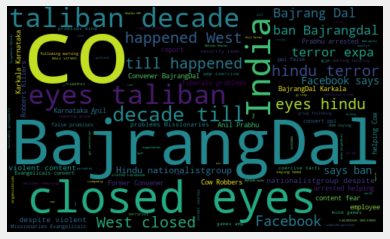

In [114]:
#plot the WordClou
allwords = ''.join(tweets for tweets in df['Tweets'])
Word_Cloud = WordCloud(width = 500, height = 300, random_state = 101, max_font_size = 120)
Word_Cloud = Word_Cloud.generate(allwords)

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [115]:
# craete a function to get the sentiment of the polarity

def getSentiment(score):
  if score > 0:
    return "Positive"
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

#create a columnn in the dataframe for sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)   

df.head()

,Tweets,subjectivity,Polarity,Sentiment
0,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
1,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
2,: The report stated that Facebook decided agai...,0.10,0.00,Neutral
3,_Tripathii Where did Bajrangdal get audacity ...,0.00,0.00,Neutral
4,YOUTUBERS\nSUB 4 SUB INBOX ME I WILL SUB U BAC...,0.25,0.25,Positive


In [116]:
#print all positive reviews

j = 1
#create a dataframe of positive reviews
sorted_DF = df.sort_values(by='Polarity')
for i in range(0,sorted_DF.shape[0]):
  if(sorted_DF['Sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sorted_DF['Tweets'][i])
    j = j+1

1) YOUTUBERS
SUB 4 SUB INBOX ME I WILL SUB U BACK
TOP 10 RICHEST COUNTRIES IN THE WORLD in 2020
richestcountries… .co/YHBwFuTz2C
2) Not only Facebook, WhatsApp, Insta and Twitter are biased but Played important role of Muslim lynching n spread hat… .co/GvNFM10nMd
3) Absolutely correct !
these are the types of people who protect our SATYA SANTANA DHARMA from propagandas and so cal… .co/dTXNKr1WEZ
4) Shame on you 
For your soft move against RSSTerrorists ()
BajrangDal RSS .co/8A5cPatPap
5) Facebook Went Soft On Bajrang Dal To Protect Business, Staff: Report
.co/X5B6DYALfB

BajrangDal
6) : Bajrang dal shilong ki baat kr rhe the, do you live in shilong, cause in shilong Christians locking and vendalising ou…
7) Bajrangdal on roads &amp;Central ParamilitaryForces eg CRPF,RAF,CISF,ITBP etc giving cover!
So,get ready to counteract. .co/WhcPiPd9U8
8) Facebook Went Soft On BajrangDalTo Protect Business, 
Acc to leftist now😂😂😂
👇🏻👇🏻👇🏻👇🏻👇🏻 .co/YkXnjFr1H4
9) Accounts from terrorist handle are avail

In [107]:
#print negative tweets
j = 1
#create a dataframe of positive reviews
sorted_DF = df.sort_values(by='Polarity')
for i in range(0,sorted_DF.shape[0]):
  if(sorted_DF['Sentiment'][i] == 'Negative'):
    print(str(j) + ') '+ sorted_DF['Tweets'][i])
    j = j+1

1) CAHP: India 
Facebook says it did not ban Bajrangdal, a Hindu nationalist  group, despite violent content because of fear of b…
2) : Facebook fears cracking down on hate groups like BajrangDal might endanger both the company’s business prospects and its st…
3) Facebook’s internal security team had said that if the organisation classified the BajrangDal as a “dangerous org… .co/MWIYu4YIni
4) Facebook fears cracking down on hate groups like BajrangDal might endanger both the company’s business prospects an… .co/OyiQmQLoue
5) : Like they closed their eyes on taliban 4 a decade till 9/11 happened. West has closed its eyes on hindu terror. The expa…
6) : Like they closed their eyes on taliban 4 a decade till 9/11 happened. West has closed its eyes on hindu terror. The expa…
7) In India,  Fears Crackdown on Hate Groups Could Backfire on Its Staff : WSJ 

Facebook
BajrangDal .co/0ByoByHO64
8) : Like they closed their eyes on taliban 4 a decade till 9/11 happened. West has closed its eyes o

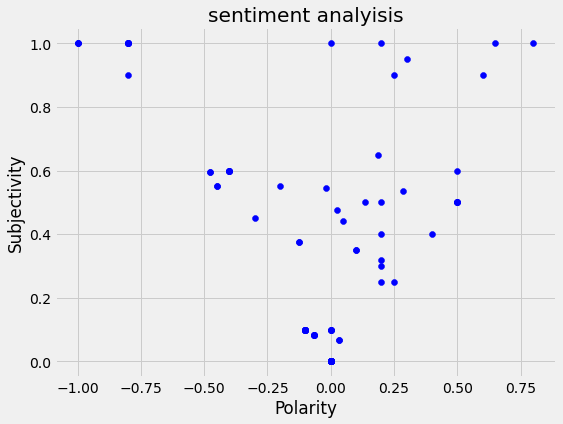

In [120]:
#plot the subjectivity vs polarity

plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['subjectivity'][i], color = 'blue')

plt.title('sentiment analyisis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [121]:
#get the percentage of positive tweets
ptweets = df[df['Sentiment'] == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0]/df.shape[0],1)

0.3

In [124]:
#get the percentage of negtive tweets
ntweets = df[df['Sentiment'] == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0]/df.shape[0],1)

0.5

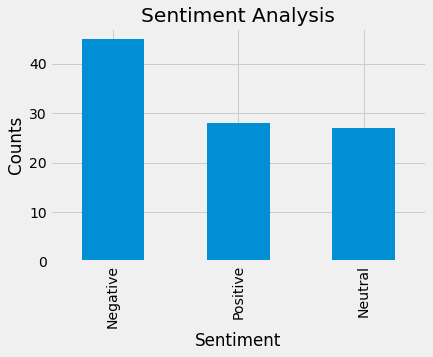

In [125]:
#plot of sentiment

df['Sentiment'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Sentiment'].value_counts().plot(kind = 'bar')